<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
 
wine = pd.read_csv("https://raw.githubusercontent.com/namoshi/colab/master/winequality-red.csv", sep=";")
wine.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.3

In [17]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
#X = wine.loc[:, ['density']].as_matrix()
X = wine.loc[:, ['density']]

# 目的変数に "alcohol (アルコール度数)" を利用
#Y = wine['alcohol'].as_matrix()
Y = wine['alcohol']

print('X\n', X)
print('Y\n', Y)
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print('Coef\n', clf.coef_)
 
# 切片 (誤差)
print('intercept=', clf.intercept_)
 
# 決定係数
print('R^2=', clf.score(X, Y))

X
       density
0     0.99780
1     0.99680
2     0.99700
3     0.99800
4     0.99780
...       ...
1594  0.99490
1595  0.99512
1596  0.99574
1597  0.99547
1598  0.99549

[1599 rows x 1 columns]
Y
 0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64
Coef
 [-280.16382307]
intercept= 289.67534338256456
R^2= 0.2461943643971065


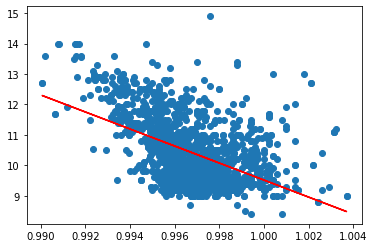

In [9]:
# matplotlib パッケージを読み込み
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X), color='r')

In [14]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "quality (品質スコア以外すべて)" を利用
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality
 
# 目的変数に "quality (品質スコア)" を利用
Y = wine['quality']

# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334
21.965208449451815
